# Table E18
## The correlation between perc15 ratio and IEAs. 
We divide the lung into regions based on the distance to the boundaries of the lung, as shown in Supplemental Figure E3. We compute the logarithm of the perc15 ratio with different regions.  

In [1]:
import sys
sys.path.append("../../src/")
import IEA_model
import numpy as np
import torch
import pandas as pd
from torch.utils.data import DataLoader
import utility

from importlib import reload 

from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt 

from scipy.stats import pearsonr

# Loading data

In [2]:
df_bands = utility.load_perc15_bands()
df_IEA_train = pd.read_csv("../../output/IEA_train.csv").set_index("sid")
df_IEA_test = pd.read_csv("../../output/IEA_test.csv").set_index("sid")

df_merged = pd.merge(df_bands, df_IEA_test, left_index = True, right_index = True)

# Computing the logarithm of the ratio

In [3]:
peel_list = ["r0_5", "r5_10", "r10_15", "r15_20"]
core = "r20+"

res = []

for peel in peel_list:
    Q = np.log( df_merged[ peel + "_perc15" ] / df_merged[ core + "_perc15" ] )
    r0, p0 = pearsonr(df_merged["IEA0"], Q)
    r1, p1 = pearsonr(df_merged["IEA1"], Q)
    tmp= [ "{:.2f}".format( r0 ),
           "{:.2f}".format( r1 )
         ]
    
    if p0 <.05:
        tmp[0] += "*"
    if p0 <.01:
        tmp[0] += "*"
    if p0 <.001:
        tmp[0] += "*"

    if p1 <.05:
        tmp[1] += "*"
    if p1 <.01:
        tmp[1] += "*"
    if p1 <.001:
        tmp[1] += "*"
        
    res.append(tmp)
    
    
res = np.array(res)    

# Generating the table

In [4]:
row_labels = ["log( perc15$_{R=0-5}$/perc15$_{R=20+}$)", 
             "log( perc15$_{R=5-10}$/perc15$_{R=20+}$)", 
             "log( perc15$_{R=10-15}$/perc15$_{R=20+}$)",
             "log( perc15$_{R=15-20}$/perc15$_{R=20+}$)",
            ] 

col_labels = ["IEA$_{emph}$", "IEA$_{airway}$"]

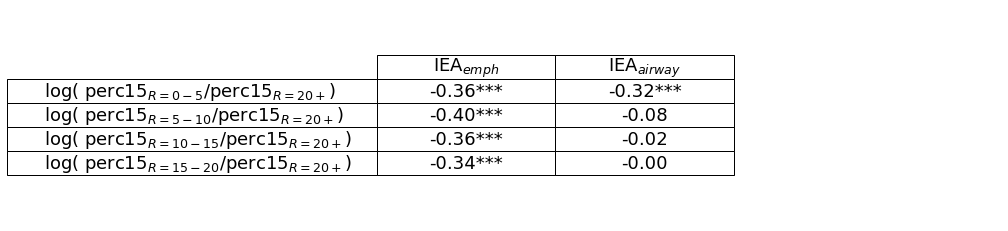

In [5]:
plt.figure(figsize=(16,4))
the_table=plt.table(cellText=res, rowLabels=row_labels, colLabels = col_labels,
                    colWidths = [.1]*res.shape[1], loc='center',cellLoc = "center")
plt.axis('off')
the_table.auto_set_font_size(False)
the_table.set_fontsize(18)
the_table.scale(2, 2)